- 線形に分類を行うアルゴリズム
- カーネルSVMを使うことで非線形分離問題にも対応

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_regions(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(0, 12, 0.1),
                           np.arange(0, 12, 0.1))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [2]:
import pandas as pd
df = pd.read_csv('./dataset/limit_lr.csv')
df.head(3)

,x1,x2,y
0,4.461253,3.329877,0
1,3.184815,1.770784,0
2,2.501561,4.932898,0


In [5]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

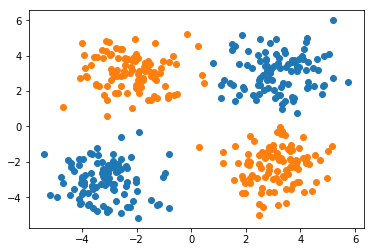

In [6]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1])
plt.scatter(X[y==1][:, 0], X[y==1][:, 1]);

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svm.score(X_test, y_test)

1.0

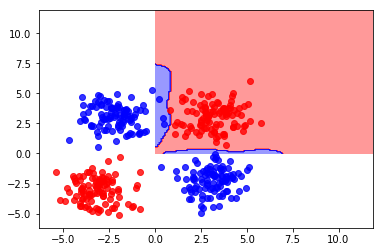

In [10]:
plot_regions(svm, X, y);